# Final Project: Predict Rainy Weather

Name: <br>
ID: <br>
Date: <br>
Course: <br>

#  Introduction
Weather prediction is a challenging task to achieve due to the numerous variables that are connected to the weather. However, predicting the weather is of high importance for various reasons such as sports events, vacations, agriculture, and so on.

In the following analysis, we examine a large dataset of different meteorological stations in the bet Dagan during the years 2013-2021, specifically during the rainy months of September to April. The source of the data is the Meteorological Israeli Center (IMS), and I have obtained permission to use the data from the center and received tokens. Afterwards, I extracted the data from the IMS database using an API method. The next step was to clean and engineer the large dataset, eventually resulting in a high-quality single dataset containing numerous meteorological features. We expect that at least some of these features can predict the weather.

Afterwards, I analyzed the data and found correlations, patterns, and anomalies. The next step was to build a classification machine learning model that predicts if the weather will be dry, drizzly, or rainy.

Finally, I analyzed the ML model, which will help us understand the real factors that influence the probability of rain. Furthermore, it can help interpret and understand the model, and it will give us a tool to represent it to our customers.

#### Table of Content:
1. import Data
2. Data Cleaning
3. EDA (Data analysis)
4. Data enigneering
5. ML model
6. Summary
7. References


In [73]:

conda install imblearn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - imblearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
# general tools
import json
import glob
import os
import numpy as np


#data tools
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler

#ML tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



#visulaisation tools
import matplotlib.pyplot as plt
import seaborn as sns
import shap

C:\AnacondDa\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 1. import data
The data utilized in this project was obtained from the Israeli Meteorolo
gical Center (IMS) database, with prior permission obtained for educational purposes. Access to the data was facilitated through the use of the Softman API platform. The data encompasses meteorological information from the period of September 2013 to April 2021. This specific time frame was selected as it pertains to the prediction of rainy days during the relevant months.


In this project, several distinct datasets were extracted from the IMS database using the Softman API platform. These datasets include:

1. Station data - this dataset provides detailed information about all the stations of the IMS, including specific station information and the features that can be obtained from each station.
2. Station 54 - this dataset pertains to the Bet Dagan station and was obtained through the API.
3. Station 85 - this dataset also pertains to the Bet Dagan station and was obtained through the API.
4. Cloud data - this dataset contains information on clouds and was extracted using the structured API on the IMS website."

In [3]:
# import the station data 
with open('C:\\Users\\אלי ובת7\\Downloads\\מבחנים\\New folder\\להדפיס לשבת\\Project\\Michal_proj (1)\\station_list.json') as f:
    data = json.load(f)
station_data = pd.DataFrame(data)

In [4]:
station_data.head()

,stationId,name,shortName,stationsTag,location,timebase,active,owner,regionId,monitors,StationTarget
0,2,AVNE ETAN,AVNE ETA,(null),"{'latitude': 32.817, 'longitude': 35.763}",10,True,ims,8,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",
1,6,BET ZAYDA,BET ZAYD,(null),"{'latitude': 32.881, 'longitude': 35.653}",10,True,ims,9,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",
2,8,ZEMAH,ZEMAH,(null),"{'latitude': 32.704, 'longitude': 35.584}",10,True,ims,9,"[{'channelId': 1, 'name': 'WS', 'alias': None,...",
3,10,MEROM GOLAN PICMAN,MEROM GO,(null),"{'latitude': 33.133, 'longitude': 35.783}",10,True,ims,8,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",
4,11,YAVNEEL,YAVNEEL,(null),"{'latitude': 32.683, 'longitude': 35.516}",10,True,ims,9,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",


In [5]:
#station 54
station_data[station_data['name']=='BET DAGAN']

,stationId,name,shortName,stationsTag,location,timebase,active,owner,regionId,monitors,StationTarget
29,54,BET DAGAN,BET DAGA,(null),"{'latitude': 32.009, 'longitude': 34.814}",10,True,ims,13,"[{'channelId': 1, 'name': 'Rain', 'alias': Non...",


In [6]:
#station 85

station_data[station_data['name']=='BET DAGAN RAD']

,stationId,name,shortName,stationsTag,location,timebase,active,owner,regionId,monitors,StationTarget
45,85,BET DAGAN RAD,BET DAGA,(null),"{'latitude': None, 'longitude': None}",10,True,ims,13,"[{'channelId': 6, 'name': 'NIP', 'alias': None...",


## 1.1 Import Bet-Dagan station 54 Data
The data was downloaded from the Postman API platform to multiple JSON files. In order to utilize the data in this project, it was imported and transformed into a dataframe format using the following process

In [7]:
# import the bet dagan files from the database folder

path_to_json = 'C:\\Users\\אלי ובת7\\Downloads\\מבחנים\\New folder\\להדפיס לשבת\\Project\\Michal_proj (1)\\DataBase_54' #  path of the Datasets
json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern) # list of dataset paths
list_of_data_bd_54=[] # creat list wich contains the database of bet dagan

# the loop iterate over the file_list and import each file to the list_of_data_bd
for file in file_list:
    with open(file) as f:
        data = json.load(f)
    list_of_data_bd_54.append(pd.DataFrame.from_dict(data))
        


In [8]:
def row2DF_st54(df):

    """ the function pre-process the row data and convert to DF
    input: df- raw DataFrame
    return:  pre-processeed Dataframe
    """
    list_of_dic=[]
    for i in df['data']:
        dic=dict()
        data=(pd.DataFrame.from_dict(i))
        dic['time']=data['datetime'][0]
        dic['rain']=data['channels'][0]['value']
        dic['WSmax']=data['channels'][1]['value']
        dic['WDmax']=data['channels'][2]['value']
        dic['WS']=data['channels'][3]['value']
        dic['WD']=data['channels'][4]['value']
        dic['STDwd']=data['channels'][5]['value']
        dic['TD']=data['channels'][6]['value']
        dic['TDmax']=data['channels'][7]['value']
        dic['TDmin']=data['channels'][8]['value']
        dic['TG']=data['channels'][9]['value']
        dic['WS1mm']=data['channels'][10]['value']
        dic['Ws10mm']=data['channels'][11]['value']
        dic['RH']=data['channels'][13]['value']
        dic['BP']=data['channels'][14]['value']
        list_of_dic.append(dic)
    data=pd.DataFrame(list_of_dic)
    data['short_date']=data['time'].apply(lambda x: x[:13]) # create new column of short data
    return data

In [9]:
# create single DF of the features in station 54
list_of_pre_processed_data_bd_54=[]
num=0
for df in list_of_data_bd_54:
    list_of_pre_processed_data_bd_54.append(row2DF_st54(df))
data_general_bd=pd.concat(list_of_pre_processed_data_bd_54, axis=0) # concatenate all the dataframe to single data frame of station 54


In [10]:
data_general_bd

,time,rain,WSmax,WDmax,WS,WD,STDwd,TD,TDmax,TDmin,TG,WS1mm,Ws10mm,RH,BP,short_date
0,2020-12-01T00:00:00+02:00,0.0,2.5,110.0,2.1,115.0,4.5,12.6,12.6,12.5,11.6,2.3,2.3,97.0,1010.1,2020-12-01T00
1,2020-12-01T00:10:00+02:00,0.0,2.0,123.0,1.7,118.0,3.6,12.7,12.7,12.6,11.4,1.9,2.1,97.0,1010.0,2020-12-01T00
2,2020-12-01T00:20:00+02:00,0.0,1.9,126.0,1.2,128.0,4.6,12.6,12.7,12.6,11.4,1.7,1.7,97.0,1009.9,2020-12-01T00
3,2020-12-01T00:30:00+02:00,0.0,1.8,116.0,1.0,116.0,5.6,12.5,12.7,12.4,11.0,1.5,1.1,96.0,1009.9,2020-12-01T00
4,2020-12-01T00:40:00+02:00,0.0,1.8,130.0,1.4,124.0,4.2,12.4,12.4,12.3,10.7,1.6,1.5,96.0,1009.9,2020-12-01T00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,2021-01-31T23:10:00+02:00,0.0,1.7,111.0,1.3,108.0,5.1,10.7,10.8,10.7,9.2,1.6,1.7,96.0,1015.1,2021-01-31T23
4459,2021-01-31T23:20:00+02:00,0.0,1.4,122.0,1.1,108.0,8.6,10.6,10.7,10.5,9.0,1.3,1.2,96.0,1015.3,2021-01-31T23
4460,2021-01-31T23:30:00+02:00,0.0,1.6,133.0,1.2,128.0,4.3,10.3,10.5,10.3,8.8,1.5,1.3,96.0,1015.2,2021-01-31T23
4461,2021-01-31T23:40:00+02:00,0.0,1.3,125.0,1.1,127.0,3.0,10.3,10.3,10.2,8.6,1.2,1.2,97.0,1015.1,2021-01-31T23


## 1.2 Import Bet-Dagan station 85 Data
The data was downloaded from the Postman API platform to multiple JSON files. In order to utilize the data in this project, it was imported and transformed into a dataframe format using the following process

In [11]:
# import the bet dagan files from the database folder

path_to_json = 'C:\\Users\\אלי ובת7\\Downloads\\מבחנים\\New folder\\להדפיס לשבת\\Project\\Michal_proj (1)\\DataBase_85*' #  path of the Datasets
json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern) # list of dataset paths
list_of_data_bd=[] # creat list wich contains the database of bet dagan

# the loop iterate over the file_list and import each file to the list_of_data_bd
for file in file_list:
    with open(file) as f:
        data = json.load(f)
    list_of_data_bd.append(pd.DataFrame.from_dict(data))
        

In [12]:
def row2DF_st85(df):

    """ the function pre-process the row data and convert to DF
    input: df- raw DataFrame
    return:  pre-processeed Dataframe
    """
    list_of_dic=[]
    for i in df['data']:
        dic=dict()
        data=(pd.DataFrame.from_dict(i))
        dic['time']=data['datetime'][0]
        dic['NIP']=data['channels'][0]['value']
        dic['Grad']=data['channels'][1]['value']
        dic['DiffR']=data['channels'][2]['value']
        list_of_dic.append(dic)
    data=pd.DataFrame(list_of_dic)
    data['short_date']=data['time'].apply(lambda x: x[:13]) # create new column of short data
    return data

In [13]:
# create single DF of data_rad_bd
list_of_pre_processed_data_bd_85=[]
for df in list_of_data_bd:
    list_of_pre_processed_data_bd_85.append(row2DF_st85(df))
data_rad_bd=pd.concat(list_of_pre_processed_data_bd_85, axis=0) # concatenate all the dataframe to single data frame of station 85


In [14]:
data_rad_bd

,time,NIP,Grad,DiffR,short_date
0,2020-09-01T00:00:00+03:00,0.0,0.0,0.0,2020-09-01T00
1,2020-09-01T00:10:00+03:00,0.0,0.0,0.0,2020-09-01T00
2,2020-09-01T00:20:00+03:00,0.0,0.0,0.0,2020-09-01T00
3,2020-09-01T00:30:00+03:00,0.0,0.0,0.0,2020-09-01T00
4,2020-09-01T00:40:00+03:00,0.0,0.0,0.0,2020-09-01T00
...,...,...,...,...,...
13069,2013-11-30T23:10:00+02:00,0.0,0.0,0.0,2013-11-30T23
13070,2013-11-30T23:20:00+02:00,0.0,0.0,0.0,2013-11-30T23
13071,2013-11-30T23:30:00+02:00,1.0,0.0,0.0,2013-11-30T23
13072,2013-11-30T23:40:00+02:00,1.0,0.0,0.0,2013-11-30T23


## 1.3 Import Bet-Dagan station clouds data
The following section of the project utilizes the structured API from the IMS website (ims.co.il). The necessary variables were defined and the data was downloaded as a CSV file

In [15]:
# import the bet dagan  data of cluds and concatenate it to single DF

path = 'C:\\Users\\אלי ובת7\\Downloads\\מבחנים\\New folder\\להדפיס לשבת\\Project\\Michal_proj (1)\\clouds*' 
all_files = glob.glob(os.path.join(path , "*.csv"))

list_data_clouds = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    list_data_clouds.append(df)

data_clouds_bd = pd.concat(list_data_clouds, axis=0) # concatenate the databases of clouds
data_clouds_bd['short_date']=data_clouds_bd['Date & Time (Winter)'].apply(lambda x: x[6:10]+'-'+x[3:5]+'-'+x[0:2]+'T'+x[11:13]) 

In [16]:
data_clouds_bd

,Station,Date & Time (Winter),Total clouds cover (code),Total low clouds cover (code),Low clouds base (code),Low clouds type (code),Medium clouds type (code),Hight clouds type (code),Visibility (code),short_date
0,Bet Dagan Man 01/1964-11/2022,01/09/2013 02:00,3.0,3.0,5.0,5.0,0.0,0.0,60.0,2013-09-01T02
1,Bet Dagan Man 01/1964-11/2022,01/09/2013 05:00,1.0,1.0,5.0,5.0,0.0,0.0,60.0,2013-09-01T05
2,Bet Dagan Man 01/1964-11/2022,01/09/2013 08:00,1.0,1.0,6.0,1.0,0.0,0.0,60.0,2013-09-01T08
3,Bet Dagan Man 01/1964-11/2022,01/09/2013 11:00,5.0,5.0,6.0,1.0,0.0,0.0,70.0,2013-09-01T11
4,Bet Dagan Man 01/1964-11/2022,01/09/2013 14:00,2.0,2.0,6.0,1.0,0.0,0.0,70.0,2013-09-01T14
...,...,...,...,...,...,...,...,...,...,...
24049,Bet Dagan Man 01/1964-11/2022,30/11/2021 11:00,5.0,0.0,9.0,0.0,0.0,4.0,65.0,2021-11-30T11
24050,Bet Dagan Man 01/1964-11/2022,30/11/2021 14:00,6.0,0.0,9.0,0.0,0.0,6.0,70.0,2021-11-30T14
24051,Bet Dagan Man 01/1964-11/2022,30/11/2021 17:00,6.0,0.0,9.0,0.0,0.0,8.0,60.0,2021-11-30T17
24052,Bet Dagan Man 01/1964-11/2022,30/11/2021 20:00,5.0,4.0,4.0,8.0,0.0,1.0,60.0,2021-11-30T20


## 1.4 Merge the Datasets
In order to proceed to the next level of analysis, it was necessary to concatenate the three separate databases into a single dataset

In [17]:
# merge the  station datasets
merged_data=pd.merge(data_general_bd, data_rad_bd, on='time')
merged_data['short_date']=merged_data['short_date_x']

In [18]:
# merge the  merged_data and the cloud Data
merged_data=merged_data.merge(data_clouds_bd,on='short_date', how='outer')

In [19]:
merged_data.head()

,time,rain,WSmax,WDmax,WS,WD,STDwd,TD,TDmax,TDmin,...,short_date,Station,Date & Time (Winter),Total clouds cover (code),Total low clouds cover (code),Low clouds base (code),Low clouds type (code),Medium clouds type (code),Hight clouds type (code),Visibility (code)
0,2020-12-01T00:00:00+02:00,0.0,2.5,110.0,2.1,115.0,4.5,12.6,12.6,12.5,...,2020-12-01T00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-01T00:10:00+02:00,0.0,2.0,123.0,1.7,118.0,3.6,12.7,12.7,12.6,...,2020-12-01T00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-01T00:20:00+02:00,0.0,1.9,126.0,1.2,128.0,4.6,12.6,12.7,12.6,...,2020-12-01T00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-01T00:30:00+02:00,0.0,1.8,116.0,1.0,116.0,5.6,12.5,12.7,12.4,...,2020-12-01T00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-01T00:40:00+02:00,0.0,1.8,130.0,1.4,124.0,4.2,12.4,12.4,12.3,...,2020-12-01T00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Cleaning

Now that a single dataset has been created, containing multiple features, it is necessary to examine and transform the data from low quality to high quality, in preparation for data analysis and machine learning modeling.

To accomplish this, the following steps were taken:

1. Identification and handling of null values
2. Verification of data types
3. Creation of a new column for months- this new column is expected to be important in the prediction of rain, as the probability of rain in January is likely to be higher than in September.
4. Dummy features - this process is used to convert categorical variables into numerical variables, to enable their use in machine learning models."

### 2.1 Null values
A significant limitation of the dataset is that the station datasets have samples taken every 10 minutes, while the cloud data set is sampled every 3 hours (at best). Despite this, it is deemed important to retain the cloud columns as they are believed to contain valuable information (this will be further examined during the exploratory data analysis phase).

In the next section, the following steps were taken to address the null values in the data:
1. Grouping the data from a 10-minute to 1-hour frequency. This was achieved by using the groupby function with mean, max, and sum methods applied to various feature attributes. For example, the 'rain' feature was grouped using the sum method, while the 'max wind speed' feature was grouped using the max method. The specific details of this process can be found in the code. This method was used as it was determined that not all the 10-minute samples were necessary, particularly in light of the lower frequency of the cloud data samples.

2. Attempts were made to use imputation methods to backfill missing values for the cloud features, but it was found that this decreased the overall performance of the model. As a result, it was decided not to fill in the null values for the cloud data.

3. A conservative approach was taken and all rows containing null values in at least 20 positions were dropped.

4. After step 3, there were still a small number of samples with null values (less than 20). These were filled with the median value."

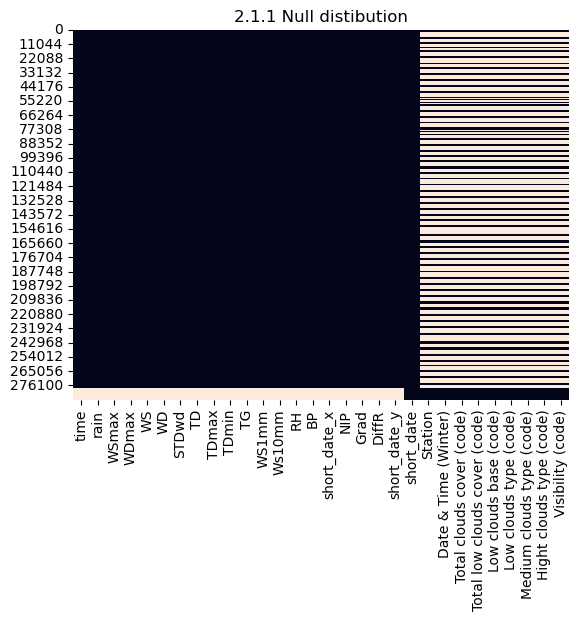

In [20]:
sns.heatmap(merged_data.isnull(), cbar=False)
plt.title("2.1.1 Null distibution");

In [21]:
# 1. groupby with diffrent methos as its shown
gb_data=merged_data.groupby('short_date').agg({'rain':'sum', 'WSmax':'max','WDmax':"max",'WS':'mean','WD':'mean',
                                               'STDwd':'mean', 'TD':'mean', 'TDmax':"max",
       'TDmin':'min', 'TG':'mean', 'WS1mm':'mean', 'Ws10mm':'mean', 'RH':'mean', 'BP':'mean', 'NIP':'mean',
       'Grad':'mean', 'DiffR':'mean',
        'Total clouds cover (code)':'mean',
       'Total low clouds cover (code)':'mean', 'Low clouds base (code)':'mean',
       'Low clouds type (code)':'mean', 'Medium clouds type (code)':'mean',
       'Hight clouds type (code)':'mean', 'Visibility (code)':'mean'})

In [22]:
gb_data

,rain,WSmax,WDmax,WS,WD,STDwd,TD,TDmax,TDmin,TG,...,NIP,Grad,DiffR,Total clouds cover (code),Total low clouds cover (code),Low clouds base (code),Low clouds type (code),Medium clouds type (code),Hight clouds type (code),Visibility (code)
short_date,,,,,,,,,,,,,,,,,,,,,
2013-09-01T00,0.0,3.5,163.0,2.016667,157.333333,7.733333,24.766667,25.1,24.4,24.150000,...,1.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-01T01,0.0,4.5,167.0,2.266667,155.000000,10.066667,24.233333,24.5,24.0,23.716667,...,0.666667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-01T02,0.0,4.2,174.0,2.300000,163.166667,10.350000,24.450000,24.5,24.2,24.133333,...,1.000000,0.0,0.0,3.0,3.0,5.0,5.0,0.0,0.0,60.0
2013-09-01T03,0.0,3.8,189.0,2.016667,173.166667,11.400000,24.500000,24.6,24.4,24.050000,...,0.666667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-01T04,0.0,4.0,190.0,2.016667,171.166667,9.150000,24.183333,24.4,23.8,23.433333,...,0.166667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30T11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,0.0,9.0,0.0,0.0,4.0,65.0
2021-11-30T14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,0.0,9.0,0.0,0.0,6.0,70.0
2021-11-30T17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,0.0,9.0,0.0,0.0,8.0,60.0


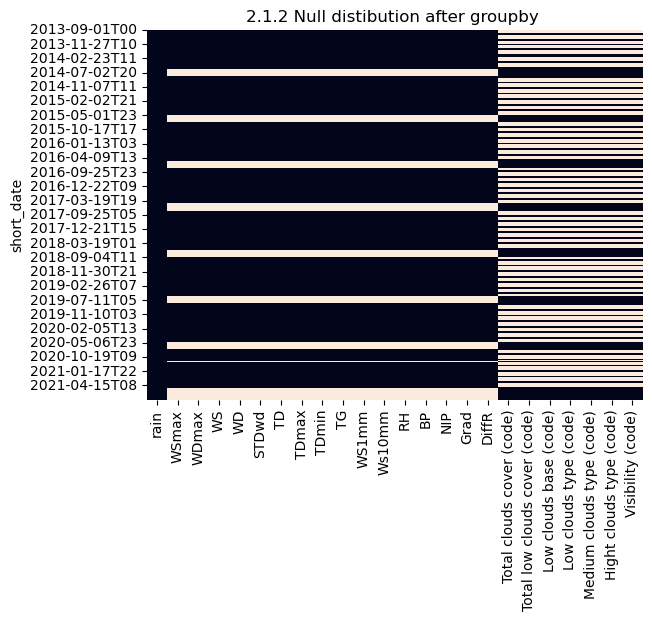

In [23]:
sns.heatmap(gb_data.isnull(), cbar=False)
plt.title("2.1.2 Null distibution after groupby ");

In [24]:
gb_data.isna().sum()

rain                                 0
WSmax                             8867
WDmax                             8867
WS                                8867
WD                                8867
STDwd                             8867
TD                                8867
TDmax                             8867
TDmin                             8867
TG                                8867
WS1mm                             8867
Ws10mm                            8867
RH                                8867
BP                                8867
NIP                               8867
Grad                              8867
DiffR                             8867
Total clouds cover (code)        30507
Total low clouds cover (code)    30515
Low clouds base (code)           30508
Low clouds type (code)           30515
Medium clouds type (code)        30516
Hight clouds type (code)         30518
Visibility (code)                30482
dtype: int64

In [25]:
# 3. drop rows with at least 20 correct values
gb_data.dropna(thresh=20,inplace=True)

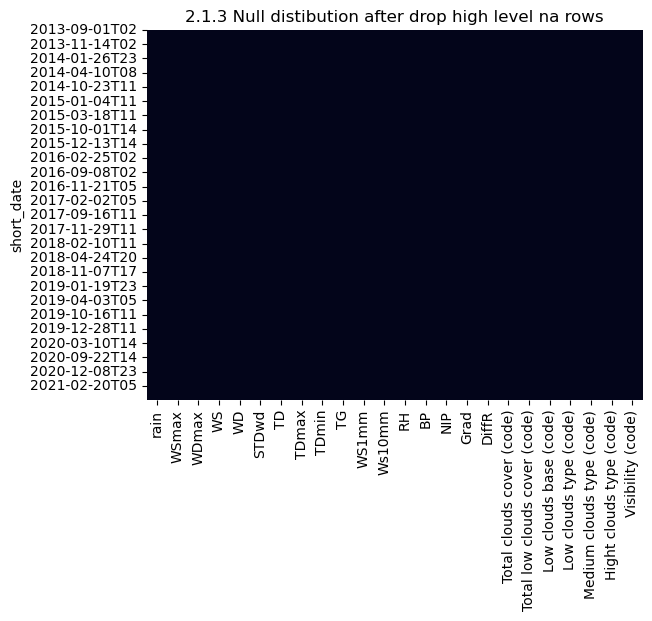

In [26]:
sns.heatmap(gb_data.isnull(), cbar=False)
plt.title("2.1.3 Null distibution after drop high level na rows");

In [27]:
#null distibution over the data set
gb_data.isna().sum()

rain                             0
WSmax                            0
WDmax                            0
WS                               0
WD                               0
STDwd                            0
TD                               0
TDmax                            0
TDmin                            0
TG                               0
WS1mm                            0
Ws10mm                           0
RH                               0
BP                               0
NIP                              0
Grad                             0
DiffR                            0
Total clouds cover (code)        0
Total low clouds cover (code)    5
Low clouds base (code)           0
Low clouds type (code)           5
Medium clouds type (code)        5
Hight clouds type (code)         6
Visibility (code)                4
dtype: int64

In [28]:
#4. fill na value by the median of the column
gb_data=gb_data.fillna(gb_data.median())

In [29]:
gb_data.isna().sum().sum()

0

In [30]:
gb_data

,rain,WSmax,WDmax,WS,WD,STDwd,TD,TDmax,TDmin,TG,...,NIP,Grad,DiffR,Total clouds cover (code),Total low clouds cover (code),Low clouds base (code),Low clouds type (code),Medium clouds type (code),Hight clouds type (code),Visibility (code)
short_date,,,,,,,,,,,,,,,,,,,,,
2013-09-01T02,0.0,4.2,174.0,2.300000,163.166667,10.350000,24.450000,24.5,24.2,24.133333,...,1.000000,0.000000,0.000000,3.0,3.0,5.0,5.0,0.0,0.0,60.0
2013-09-01T05,0.0,5.4,175.0,2.866667,159.500000,10.550000,23.800000,24.0,23.7,23.366667,...,1.833333,9.333333,7.666667,1.0,1.0,5.0,5.0,0.0,0.0,60.0
2013-09-01T08,0.0,5.9,195.0,3.133333,171.833333,14.600000,28.166667,28.8,27.6,33.900000,...,326.333333,449.500000,219.666667,1.0,1.0,6.0,1.0,0.0,0.0,60.0
2013-09-01T11,0.0,7.6,283.0,4.816667,263.000000,16.383333,31.716667,32.4,31.0,41.833333,...,601.000000,826.333333,237.833333,5.0,5.0,6.0,1.0,0.0,0.0,70.0
2013-09-01T14,0.0,8.3,298.0,4.316667,275.166667,18.416667,31.466667,31.9,31.0,39.716667,...,654.500000,635.333333,157.000000,2.0,2.0,6.0,1.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30T11,0.0,5.6,287.0,3.266667,264.333333,17.416667,28.100000,28.6,27.3,39.200000,...,765.000000,965.166667,184.500000,0.0,0.0,9.0,0.0,0.0,0.0,60.0
2021-04-30T14,0.0,7.8,352.0,4.216667,327.500000,16.033333,27.150000,27.6,26.5,36.333333,...,702.166667,751.000000,164.000000,1.0,0.0,9.0,0.0,0.0,1.0,60.0
2021-04-30T17,0.0,6.1,350.0,3.366667,238.500000,14.183333,26.450000,26.6,26.0,28.183333,...,269.333333,143.000000,69.333333,0.0,0.0,9.0,0.0,0.0,0.0,60.0


### 2.2 Data type
"In the following section of the project, the data types were examined and any necessary changes were made to ensure that all numeric columns of the data were in numerical format. This is important for both the exploratory data analysis and machine learning training portions of the project.
It was found that all the data were in float format, thus no changes were necessary in this regard


In [31]:
gb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15159 entries, 2013-09-01T02 to 2021-04-30T23
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rain                           15159 non-null  float64
 1   WSmax                          15159 non-null  float64
 2   WDmax                          15159 non-null  float64
 3   WS                             15159 non-null  float64
 4   WD                             15159 non-null  float64
 5   STDwd                          15159 non-null  float64
 6   TD                             15159 non-null  float64
 7   TDmax                          15159 non-null  float64
 8   TDmin                          15159 non-null  float64
 9   TG                             15159 non-null  float64
 10  WS1mm                          15159 non-null  float64
 11  Ws10mm                         15159 non-null  float64
 12  RH                             

### 2.3 Month feature
In the following section of the project, a new feature, 'month' was created. This feature is believed to be meaningful as it takes into account the fact that there are certain months that tend to be rainier, and that there may be different meteorological conditions that lead to rain in different months. For example, it is possible to have rain in September even when temperatures are high, which is less common in January.


In [32]:
gb_data.loc[:,'month']=gb_data.index
gb_data.loc[:,'month']=gb_data.loc[:,'month'].apply(lambda x: x[5:7])

In [33]:
gb_data

,rain,WSmax,WDmax,WS,WD,STDwd,TD,TDmax,TDmin,TG,...,Grad,DiffR,Total clouds cover (code),Total low clouds cover (code),Low clouds base (code),Low clouds type (code),Medium clouds type (code),Hight clouds type (code),Visibility (code),month
short_date,,,,,,,,,,,,,,,,,,,,,
2013-09-01T02,0.0,4.2,174.0,2.300000,163.166667,10.350000,24.450000,24.5,24.2,24.133333,...,0.000000,0.000000,3.0,3.0,5.0,5.0,0.0,0.0,60.0,09
2013-09-01T05,0.0,5.4,175.0,2.866667,159.500000,10.550000,23.800000,24.0,23.7,23.366667,...,9.333333,7.666667,1.0,1.0,5.0,5.0,0.0,0.0,60.0,09
2013-09-01T08,0.0,5.9,195.0,3.133333,171.833333,14.600000,28.166667,28.8,27.6,33.900000,...,449.500000,219.666667,1.0,1.0,6.0,1.0,0.0,0.0,60.0,09
2013-09-01T11,0.0,7.6,283.0,4.816667,263.000000,16.383333,31.716667,32.4,31.0,41.833333,...,826.333333,237.833333,5.0,5.0,6.0,1.0,0.0,0.0,70.0,09
2013-09-01T14,0.0,8.3,298.0,4.316667,275.166667,18.416667,31.466667,31.9,31.0,39.716667,...,635.333333,157.000000,2.0,2.0,6.0,1.0,0.0,0.0,70.0,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30T11,0.0,5.6,287.0,3.266667,264.333333,17.416667,28.100000,28.6,27.3,39.200000,...,965.166667,184.500000,0.0,0.0,9.0,0.0,0.0,0.0,60.0,04
2021-04-30T14,0.0,7.8,352.0,4.216667,327.500000,16.033333,27.150000,27.6,26.5,36.333333,...,751.000000,164.000000,1.0,0.0,9.0,0.0,0.0,1.0,60.0,04
2021-04-30T17,0.0,6.1,350.0,3.366667,238.500000,14.183333,26.450000,26.6,26.0,28.183333,...,143.000000,69.333333,0.0,0.0,9.0,0.0,0.0,0.0,60.0,04


### 2.4 dummy features
"In the next section, dummy variables were created for the following features: 'Low clouds type', 'Medium clouds type', and 'High clouds type'. It is important to note that the features 'Total clouds cover (code)', 'Total low clouds cover (code)', and 'Low clouds base (code)' are also categorical, but there is a linear meaning in the code (e.g., 8 clouds cover means that the entire sky is covered with clouds, while 1 clouds cover means that only 1/8 of the sky is covered with clouds).

Additionally, a dummy variable was created for the 'month' feature.

In [34]:
gb_df_dum = pd.get_dummies(gb_data, columns=['Low clouds type (code)','Medium clouds type (code)','Hight clouds type (code)','month'])

## 3. EDA
In the EDA part the data is explored in order to understand patterns, correlations, and to gain a deeper understanding of the data. This exploration of the data will aid in the analysis by directing attention to specific features and identifying irrelevant features that can be dropped, in order to reduce bias

## 3.1  Analyse the discrete features

In the next section of the project, the discrete columns were analyzed with respect to the target column (rain). The results show that on average, January is the month with the highest probability of rain, as expected. Additionally, it was found that the average yearly rain in the Bet Dagan station is 516.25 mm. Furthermore, it appears that the years 2015 and 2020 were particularly rainy compared to other years.

The types of low, medium, and high clouds were also analyzed, and it was found that low cloud types 3, 7, and 9 have a high affinity with rain,
while medium and high cloud type 10 also have a high affinity with rain

In [35]:
data_general_bd['month']=data_general_bd['short_date'].apply(lambda x:x[5:7])
data_general_bd['year']=data_general_bd['short_date'].apply(lambda x:x[0:4])


# rain by months - I divide by 10 years of measurments to get the average rain per month
value=(data_general_bd.groupby(by="month").sum()['rain']/8).values
month=(data_general_bd.groupby(by="month").sum()['rain']/8).index

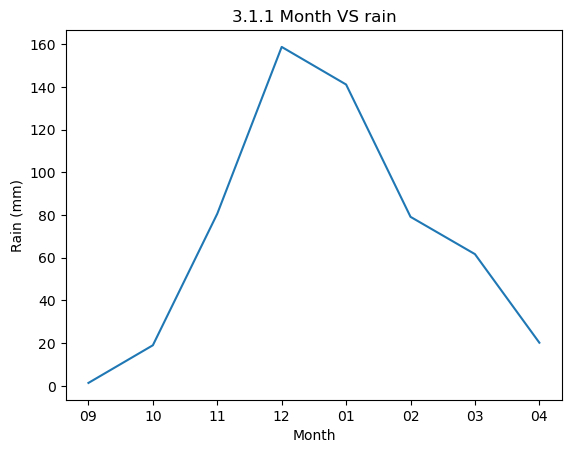

In [36]:
plt.plot([month[4],month[5],month[6],month[7],month[0],month[1],month[2],month[3]],[value[4],value[5],value[6],value[7],value[0],value[1],value[2],value[3]])
plt.title("3.1.1 Month VS rain");
plt.xlabel("Month");
plt.ylabel("Rain (mm)");

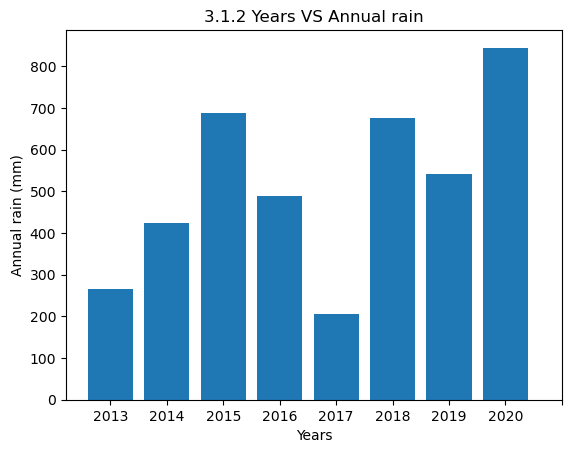

In [37]:
#low cloud type
years_vs_rain =data_general_bd.groupby(by="year").sum()['rain'][:-2]
plt.bar(years_vs_rain.index,years_vs_rain.values)
plt.xticks([0,1,2,3,4,5,6,7,8]);
plt.title('3.1.2 Years VS Annual rain')
plt.xlabel("Years");
plt.ylabel("Annual rain (mm)");
plt.show()

In [38]:
print("The average rain in Bet Dagan station during the years 2013-2020 is:",data_general_bd.groupby(by="year").sum()['rain'][:-2].mean(),'mm')

The average rain in Bet Dagan station during the years 2013-2020 is: 516.85 mm


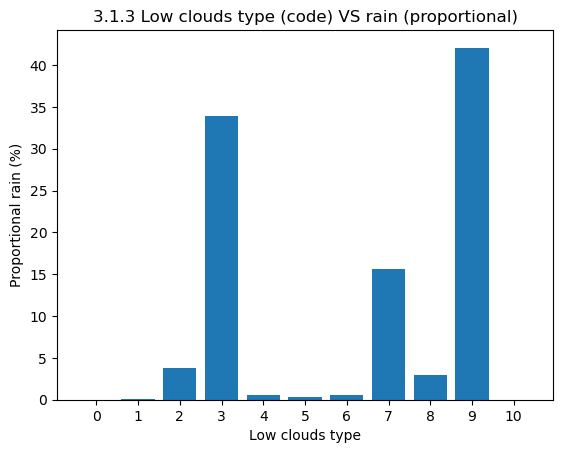

In [39]:
#low cloud type
Low_clouds_type =100*gb_data.groupby('Low clouds type (code)').mean()['rain']/gb_data.groupby('Low clouds type (code)').mean()['rain'].sum()
plt.bar(Low_clouds_type.index,Low_clouds_type.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10]);
plt.title('3.1.3 Low clouds type (code) VS rain (proportional)')
plt.xlabel("Low clouds type");
plt.ylabel("Proportional rain (%)");

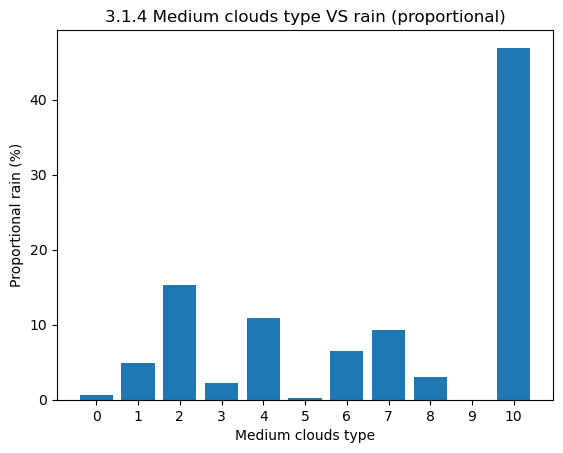

In [40]:
#low cloud type
Medium_clouds_type =100*gb_data.groupby('Medium clouds type (code)').mean()['rain']/gb_data.groupby('Medium clouds type (code)').mean()['rain'].sum()
plt.bar(Medium_clouds_type.index,Medium_clouds_type.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10]);
plt.title('3.1.4 Medium clouds type VS rain (proportional)')
plt.xlabel("Medium clouds type");
plt.ylabel("Proportional rain (%)");

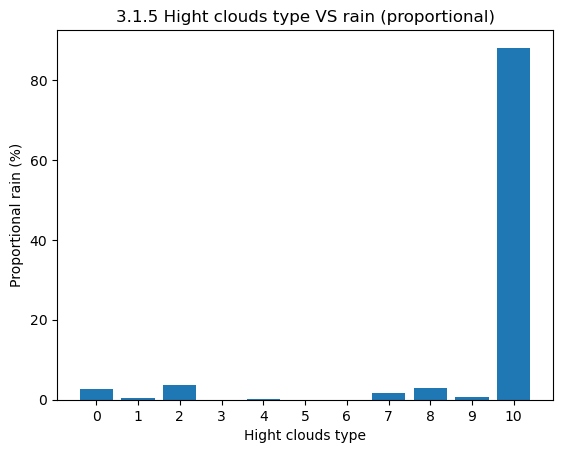

In [41]:
#low cloud type
Hight_clouds_type =100*gb_data.groupby('Hight clouds type (code)').mean()['rain']/gb_data.groupby('Hight clouds type (code)').mean()['rain'].sum()
plt.bar(Hight_clouds_type.index,Hight_clouds_type.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10]);
plt.title('3.1.5 Hight clouds type VS rain (proportional)')
plt.xlabel("Hight clouds type");
plt.ylabel("Proportional rain (%)");

In [42]:
gb_data.groupby('Low clouds type (code)').mean()['rain'].sum()

8.897041078336041

## 3.2 Analyse the continious features
In this section, the correlation of the continuous features was examined using a heatmap. The results reveal interesting correlations between features, as well as between features and the target column (rain).

There is a strong positive correlation between the features STDwd, TD, TDmin, TG, WS and RH, as well as between the TDmax and grad features and between total cloud cover and low cloud cover.

There is a slightly negative correlation between WSmax and WDmax, TDmax and Rad and relative humidity.

Additionally, there is a positive correlation between Ws_max, cloud cover (total and low clouds) and the rain column, and a negative correlation between TDmax, NIP and grad with the rain feature. These correlations make sense as high temperatures and high radiation may reduce the chance of raining, while cloud cover is likely to increase the chance of rain

Text(0.5, 1.0, '3.2.1 Heatmap correlation of continious features')

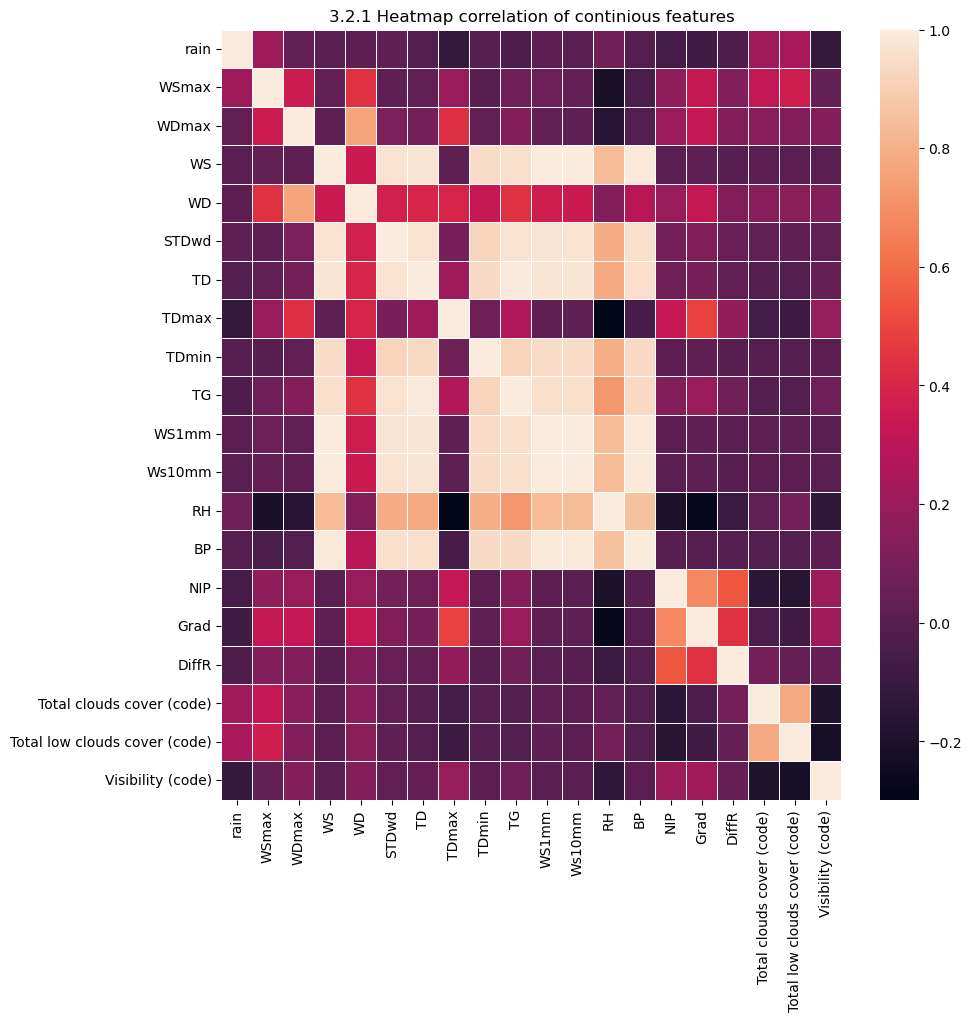

In [43]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(gb_data[['rain', 'WSmax', 'WDmax', 'WS', 'WD', 'STDwd', 'TD', 'TDmax', 'TDmin',
       'TG', 'WS1mm', 'Ws10mm', 'RH', 'BP', 'NIP', 'Grad', 'DiffR',
       'Total clouds cover (code)', 'Total low clouds cover (code)','Visibility (code)']].corr(), linewidths=.5, ax=ax)
plt.title('3.2.1 Heatmap correlation of continious features')

In [44]:
# for the further analyisis we will use the data with the dummy features
gb_data=gb_df_dum

## 4 Data enigneering
### 4.1 Target column
in the next section I define the target column as the rain, and it will have 3 categoris:
0- dry
1- drizzle 0-0.5 mm
2- rain 0.5> mm

In [45]:
gb_data['rain']=gb_data['rain'].apply(lambda x:0 if x<0.1 else 2 if x>1 else 1 )


### 4.2  Imbalance target
The data set under consideration is highly imbalanced, which can negatively impact the performance of the model. To address this issue, I have employed both undersampling and oversampling techniques in order to achieve a balance in the data set and minimize the introduction of bias. In particular, I have utilized the Synthetic Minority Over-sampling Technique (SMOTE) as it is assumed that the minority class in the data set exhibits high similarity in the feature space.<br>
Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases. (for more explanation of Imblanace target - reference 2)


Text(0.5, 1.0, '4.2.1 Target data distribution')

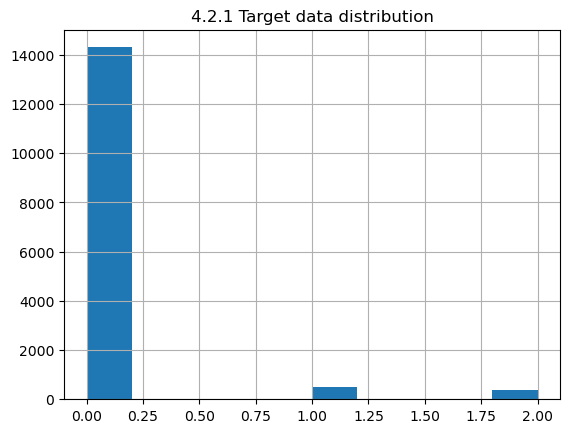

In [46]:
gb_data['rain'].hist()
plt.title("4.2.1 Target data distribution")

In [47]:
# create X and y data sets
X=gb_data.drop(columns='rain')
y=gb_data['rain']

# Initial split of the data, I split it before the oversample in order to examine if the oversample overfit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# I use SMOTE metohd to oversample the Data
rus=RandomUnderSampler(sampling_strategy={0:1000})
X_ures, y_ures=rus.fit_resample(X_train, y_train)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_ures, y_ures)

Text(0.5, 1.0, '4.2.2 Target data distribution after over-sampling')

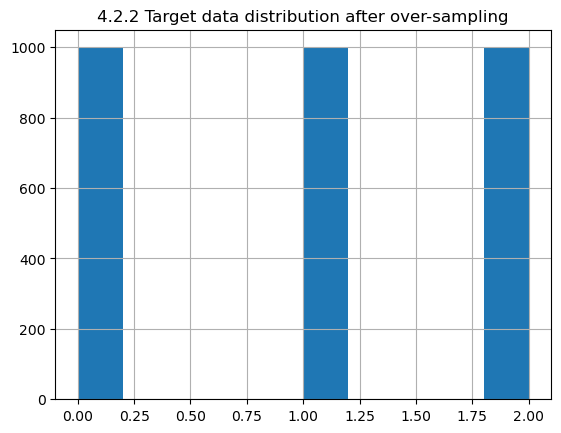

In [48]:
y_res.hist()
plt.title("4.2.2 Target data distribution after over-sampling")

### 4.3  Data Standardization 
Standardization is implemented in order to improve the model's performance. This is achieved by transforming the variables in the dataset to a standard scale through the subtraction of the mean and division by the standard deviation

In [49]:
# split the data into train and validation  
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# I use StandardScaler method in order to standartize the data
scaler = preprocessing.StandardScaler()
X_train_std=scaler.fit_transform(X_train) 
X_train_std=pd.DataFrame(X_train_std,columns=X_train.columns)

# i transform the x_val and x_test data as the scalar attribute of the train data
X_val_std=pd.DataFrame(scaler.transform(X_val),columns=X_val.columns)
X_test_std=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

## 5.   ML model 

### 5.1 Train ML algorithms

In this project, four different classification methods will be trained: Random Forest Classifier, AdaBoost Classifier, XGBoost Classifier, and K-Nearest Neighbors Classifier. These models will be evaluated on both standardized and non-standardized versions of the data set in order to determine the effect of standardization on the performance of the model

In [50]:
clf0=RandomForestClassifier()
clf0.fit(X_train,y_train)
y_pred=clf0.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       217
           1       0.86      0.88      0.87       202
           2       0.90      0.93      0.92       181

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [51]:
clf1=RandomForestClassifier()
clf1.fit(X_train_std,y_train)
y_pred=clf1.predict(X_val_std)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       217
           1       0.85      0.88      0.86       202
           2       0.91      0.91      0.91       181

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



In [52]:
clf2=AdaBoostClassifier()
clf2.fit(X_train,y_train)
y_pred=clf2.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       217
           1       0.65      0.59      0.62       202
           2       0.66      0.77      0.71       181

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.76      0.75      0.75       600



In [53]:
clf3=AdaBoostClassifier()
clf3.fit(X_train_std,y_train)
y_pred=clf3.predict(X_val_std)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       217
           1       0.65      0.59      0.62       202
           2       0.66      0.77      0.71       181

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.76      0.75      0.75       600



In [54]:
clf4= XGBClassifier(max_depth=5,min_child_weight=5, n_estimators=200,gamma=1)
clf4.fit(X_train,y_train)
y_pred=clf4.predict(X_val)
print(classification_report(y_val,y_pred))

[11:23:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       217
           1       0.83      0.83      0.83       202
           2       0.87      0.88      0.88       181

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [55]:
clf5= XGBClassifier(max_depth=5,min_child_weight=5, n_estimators=200,gamma=1)
clf5.fit(X_train_std,y_train)
y_pred=clf5.predict(X_val_std)
print(classification_report(y_val,y_pred))

[11:23:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       217
           1       0.83      0.83      0.83       202
           2       0.87      0.88      0.88       181

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [56]:
clf6= KNeighborsClassifier()
clf6.fit(X_train,y_train)
y_pred=clf6.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       217
           1       0.74      0.80      0.76       202
           2       0.77      0.86      0.81       181

    accuracy                           0.81       600
   macro avg       0.82      0.81      0.81       600
weighted avg       0.82      0.81      0.81       600



Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [57]:
clf7= KNeighborsClassifier()
clf7.fit(X_train_std,y_train)
y_pred=clf7.predict(X_val_std)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       217
           1       0.68      0.63      0.65       202
           2       0.68      0.73      0.70       181

    accuracy                           0.76       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.76      0.76      0.76       600



Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [58]:
##best score model: clf0
y_pred=clf0.predict(X_val)
confusion_matrix(y_val,y_pred)

array([[200,  17,   0],
       [  7, 177,  18],
       [  2,  11, 168]], dtype=int64)

### 5.2 Hyper parameter optimization

Hyperparameter tuning is utilized to optimize the performance of the model by fine-tuning the various hyperparameters of the classifiers. This is done in order to select the best-performing model and to further improve its performance through the adjustment of the hyperparameters. In the next part I use two methods to increase the  performance of the model- random search and afterward grid search (for more explanaton of Hyper parameter optimization - reference 3)


In [59]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier( random_state=1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=3)

In [61]:
clf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [62]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [ 20],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [750, 800,850]
}
# Create a based model
clf_random = RandomForestClassifier(random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf_random, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search model
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [750, 800, 850]},
             verbose=2)

In [63]:
grid_search.best_params_


{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 750}

In [64]:
best_param=grid_search.best_params_
best_clf=RandomForestClassifier(bootstrap= False,
 max_depth= 20,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 750,random_state=1)
best_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       n_estimators=750, random_state=1)

### 5.3 Evaluation
In the next phase of this study, various metrics will be employed to evaluate the performance of the final model on the test data. It is important to note that the test data constitutes 20% of the original dataset, prior to any balance manipulation techniques.

In the realm of classification machine learning, several important metrics are used to assess the strength and weakness of a model. One such metric is precision, which is defined as the ratio of correctly classified positive samples (true positive) to the total number of positive samples classified (true positive and false positive). In our test data, the precision of label 0 and label 2 are relatively high (100% and 66% respectively). However, the precision of label 1 (rain) is relatively low. In my opinion, this is the least detrimental error, as it is preferable for the model to predict rain when it is actually dry (a type 1 error) rather than the opposite scenario of predicting no rain when it is actually raining (a type 2 error).

Another important metric is recall, which is defined as the ratio of correctly classified positive samples to the total number of actual positive outcomes. In this case, the recall of all labels (dry, drizzle, and raining) are relatively high (91%, 71%, 77% respectively).

The F1 score is another metric which combines precision and recall, and in this case, the scores for label 0 and label 2 are relatively high compared to label 1.

The total accuracy of the model is 90%. The macro average and micro average are two similar methods used to generalize the model's score by averaging the metrics of precision, recall, and F1 score for each label. In the macro average method, we see a high recall score and a relatively low precision score.

In [65]:
y_pred=best_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2875
           1       0.21      0.75      0.32        91
           2       0.67      0.74      0.71        66

    accuracy                           0.90      3032
   macro avg       0.62      0.80      0.66      3032
weighted avg       0.97      0.90      0.93      3032



In [66]:
confusion_matrix(y_test,y_pred)

array([[2622,  245,    8],
       [   7,   68,   16],
       [   0,   17,   49]], dtype=int64)

## 5.4 ML model analysis

 In our machine learning analysis, we utilized the SHAP library, which is a visualization tool specifically designed for machine learning models. Through the use of this tool, we were able to identify that the features of cloud cover (both total and low clouds), relative humidity, wind speed maximum, and wind direction standard deviation were among the most important predictors for the model. These findings were consistent with the results obtained from the correlation heatmap, which also indicated that cloud representation was a significant feature.

Furthermore, the summary plot of the SHAP visualization revealed that low and medium clouds of type 0 were highly important predictors of dry weather. Additionally, relative humidity, wind direction maximum, wind speed 1mm, and wind speed 10mm were found to have a positive correlation with rainy weather. On the other hand, temperature, temperature maximum, wind direction standard deviation,NIP, and low cloud height were found to have a negative correlation with rainy weather. These results align well with the findings from the exploratory data analysis. (for more explanaton of shap - reference 4)

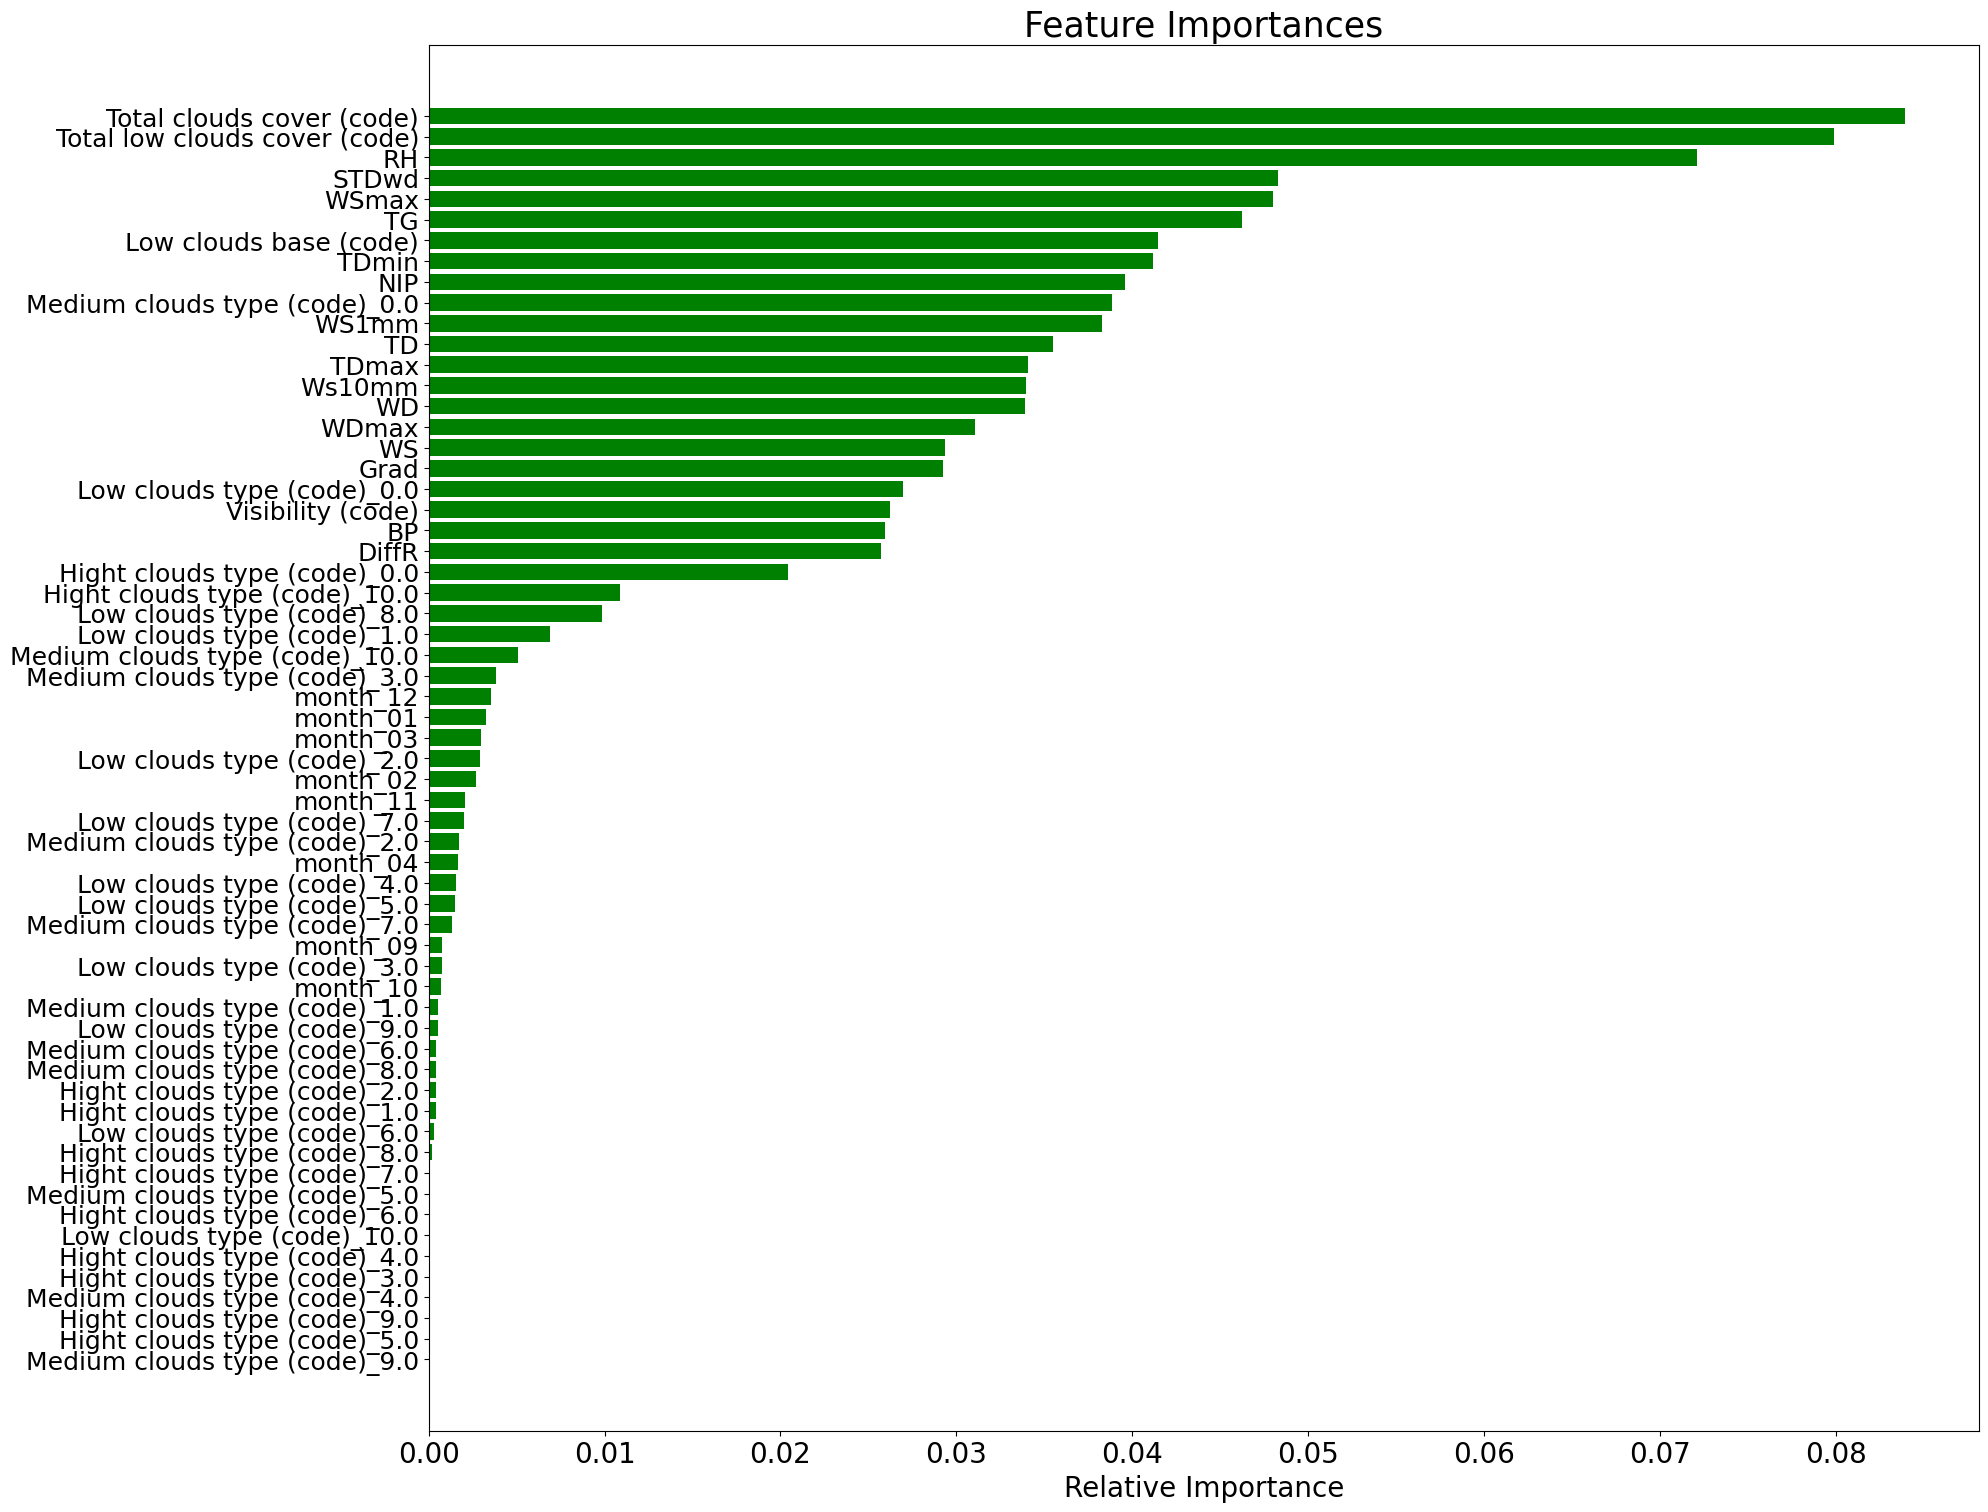

In [67]:
#feature importance 
shap.initjs()
importances = best_clf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

plt.figure(figsize=[20,18])
plt.title('Feature Importances',size=25)
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices],size=15)
plt.xticks(size=20)
plt.yticks(size=18)

plt.xlabel('Relative Importance',size=20)
plt.show()

In [68]:
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_test[:200])


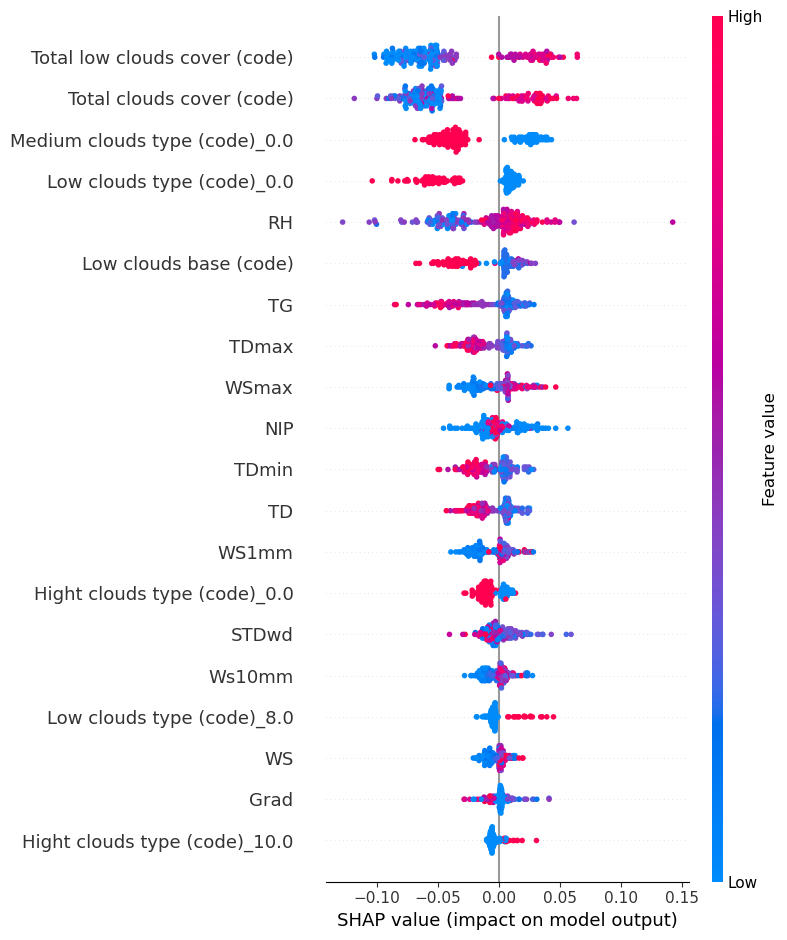

In [69]:

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],X_test[:200] )

## 6. Summary

In this study, a classification machine learning model was developed to predict dry, drizzle, and rainy weather conditions based on various meteorological features. The model was evaluated using exploratory data analysis and model analysis techniques, which revealed that cloud data was highly correlated with the probability of rainfall and was a crucial feature in the model. Additionally, relative humidity, temperature, and wind were identified as important predictors of the weather conditions. This information can be useful in future research to minimize the number of necessary parameters and improve the efficiency of the model.

The research workflow in this study followed an end-to-end data science process, starting from the identification of a research question and data extraction using an API. The data was then cleaned and transformed into a dataframe, requiring creativity and the use of new platforms such as Postman. Machine learning models were then developed, utilizing various algorithms and hyperparameter tuning, and evaluated using statistical metrics. The results indicated a high-performing model, with the exception of the accuracy of the "drizzle" label. Further improvements to the model could be achieved by incorporating more data and utilizing additional computational power and resources for deep learning methods. The research process was iterative, with adjustments made to improve the model's performance.



# 7. refernece
1. explanation of the features and clouds code
https://ims.gov.il/sites/default/files/2020-10/%D7%94%D7%A1%D7%91%D7%A8%D7%9C%D7%A7%D7%91%D7%A6%D7%99%D7%9E%D7%98%D7%94%D7%93%D7%98%D7%94%D7%A0%D7%AA%D7%95%D7%A0%D7%99%D7%9D%D7%A2%D7%A9%D7%A8%D7%93%D7%A7%D7%AA%D7%99%D7%99%D7%9D.pdf

2. imbalance reference :  https://imbalanced-learn.org/stable/references/under_sampling.html
3. hyper-paramaeter tuning - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
4. shap documentation- https://www.kaggle.com/code/dansbecker/advanced-uses-of-shap-values 
